In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset 
corona_dataset_csv=pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
#checking shape of te dataframe
corona_dataset_csv.shape

(266, 104)

In [7]:
#deleting useless columns
df=corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
#aggreagting the rows by columns
corona_dataset_aggregate=corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
#visulaizing the data
#visualizing the dataset for a country say China
corona_dataset_aggregate.loc["China"]

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

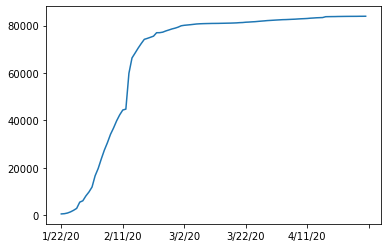

In [10]:
corona_dataset_aggregate.loc["China"].plot()

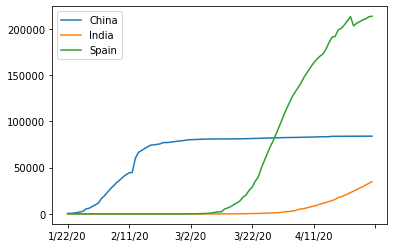

In [12]:
#visualizing dataset for different countries
corona_dataset_aggregate.loc["China"].plot()
corona_dataset_aggregate.loc["India"].plot()
corona_dataset_aggregate.loc["Spain"].plot()
plt.legend()

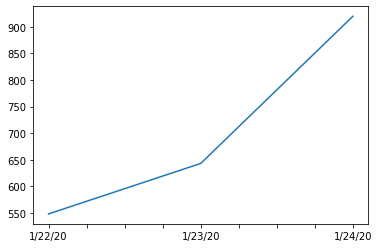

In [13]:
#finding no. od cases for first three days
corona_dataset_aggregate.loc["China"][:3].plot()

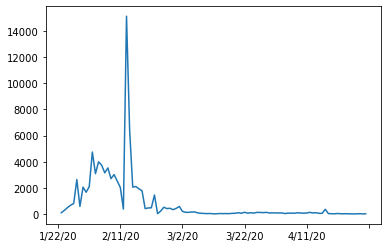

In [14]:
#calculationg the rate of infection or the fisrt derivative of the curve
corona_dataset_aggregate.loc["China"].diff().plot()

In [15]:
#max infection rate of China
#output will give the no. of cases in 24 hours
corona_dataset_aggregate.loc["China"].diff().max()

15136.0

In [16]:
corona_dataset_aggregate.loc["India"].diff().max()


1893.0

In [17]:
corona_dataset_aggregate.loc["Spain"].diff().max()

9630.0

In [18]:
#max infection rate for all countries
countries=list(corona_dataset_aggregate.index)
max_infection_rate=[]
for c in countries:
    max_infection_rate.append(corona_dataset_aggregate.loc[c].diff().max())
corona_dataset_aggregate["Max infection rate"]=max_infection_rate
corona_dataset_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [24]:
#create new dataframe with only needed columns
corona_data=pd.DataFrame(corona_dataset_aggregate["Max infection rate"])
corona_data.head()

,Max infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [26]:
#importing world happiness report dataset
happiness_report_csv=pd.read_csv("Datasets/worldwide_happiness_report.csv")
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [30]:
#removing unnecessary columns
hr=happiness_report_csv.drop(["Overall rank","Score","Generosity","Perceptions of corruption"],axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [31]:
#changng indices of the dataframe
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [32]:
#join corona dataset and world happiness dataset
data=corona_data.join(happiness_report_csv,how="inner")
data.head()

,Max infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [33]:
#check if there's any correlation in the dataset
#create correlation matrix
data.corr()

,Max infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max infection rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


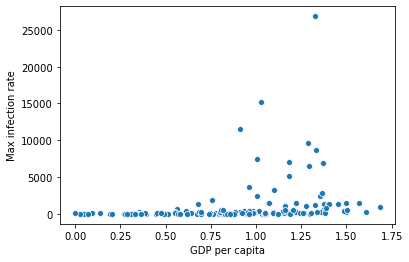

In [34]:
#Visualizing the results
#Plotting GDP vs max infection rate
x=data["GDP per capita"]
y=data["Max infection rate"]
sns.scatterplot(x,y)

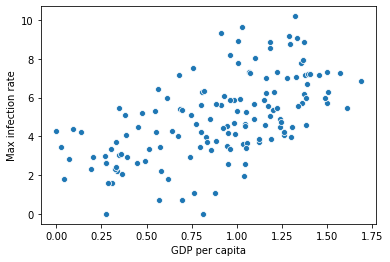

In [35]:
#plotting graph in terms of log
sns.scatterplot(x,np.log(y))

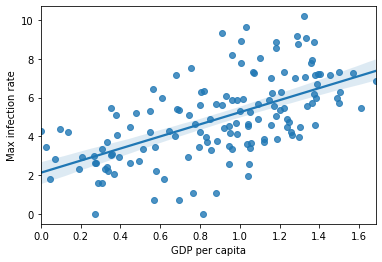

In [36]:
#plotting graph to show positive slope
sns.regplot(x,np.log(y))

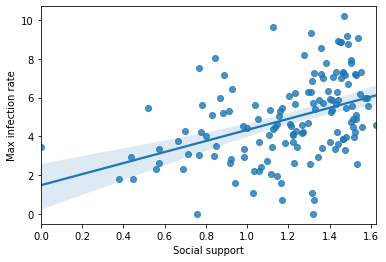

In [37]:
#Plotting ocial suppot vs max infection rate graph
a=data["Social support"]
b=data["Max infection rate"]
sns.regplot(a,np.log(b))

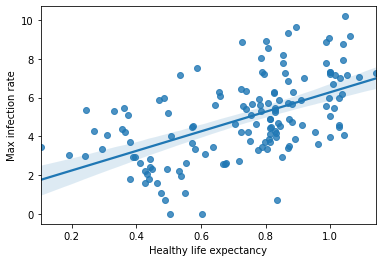

In [38]:
#Plotting Health life expectancy vs Max infection rate Graph
p=data["Healthy life expectancy"]
q=data["Max infection rate"]
sns.regplot(p,np.log(q))